In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale

In [2]:
def percent2float(data):
    output = []
    for x in data:
        output.append(float(x.strip('%'))/100)
        
    return output

def str2int(data):
    output = []
    for x in data:
        output.append(int(x))
        
    return output

def money2int(data):
    output = []
    for x in data:
        output.append(int(x.strip('$').replace(',', '')))
        
    return output

In [3]:
qhp_data = pd.read_excel('data\individual_qhp22.xlsx', sheet_name='Individual_Market_Medical')

In [4]:
qhp_data

,State Code,FIPS County Code,County Name,Metal Level,Issuer Name,HIOS Issuer ID,Plan ID (Standard Component),Plan Marketing Name,Plan Type,Rating Area,...,Drug Maximum Out Of Pocket - Family (Per Person) - 94 Percent,Primary Care Physician - 94 Percent,Specialist - 94 Percent,Emergency Room - 94 Percent,Inpatient Facility - 94 Percent,Inpatient Physician - 94 Percent,Generic Drugs - 94 Percent,Preferred Brand Drugs - 94 Percent,Non-preferred Brand Drugs - 94 Percent,Specialty Drugs - 94 Percent
0,AK,2013,Aleutians East,Gold,Premera Blue Cross Blue Shield of Alaska,38344,38344AK1060001,Premera Blue Cross Preferred Gold 1500,PPO,Rating Area 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,2013,Aleutians East,Silver,Premera Blue Cross Blue Shield of Alaska,38344,38344AK1060002,Premera Blue Cross Preferred Silver 4500,PPO,Rating Area 2,...,Included in Medical,$10,$40,30% Coinsurance after deductible,30% Coinsurance after deductible,30% Coinsurance after deductible,$15,$40,50% Coinsurance after deductible,40% Coinsurance after deductible
2,AK,2013,Aleutians East,Expanded Bronze,Premera Blue Cross Blue Shield of Alaska,38344,38344AK1060004,Premera Blue Cross Preferred Bronze 6350,PPO,Rating Area 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,2013,Aleutians East,Silver,Premera Blue Cross Blue Shield of Alaska,38344,38344AK1070001,Premera Blue Cross Preferred Silver 3000 HSA,PPO,Rating Area 2,...,Included in Medical,30% Coinsurance after deductible,30% Coinsurance after deductible,30% Coinsurance after deductible,30% Coinsurance after deductible,30% Coinsurance after deductible,25% Coinsurance after deductible,30% Coinsurance after deductible,30% Coinsurance after deductible,40% Coinsurance after deductible
4,AK,2013,Aleutians East,Expanded Bronze,Premera Blue Cross Blue Shield of Alaska,38344,38344AK1070002,Premera Blue Cross Preferred Bronze 5800 HSA,PPO,Rating Area 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109875,WY,56045,Weston,Expanded Bronze,Mountain Health CO-OP,38576,38576WY0020003,HIGH PLAINS IND BRONZE WY,PPO,Rating Area 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109876,WY,56045,Weston,Expanded Bronze,Mountain Health CO-OP,38576,38576WY0020004,HIGH PLAINS IND BRONZE WY HSA,PPO,Rating Area 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109877,WY,56045,Weston,Gold,Mountain Health CO-OP,38576,38576WY0020005,HIGH PLAINS IND GOLD WY BASE,PPO,Rating Area 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109878,WY,56045,Weston,Silver,Mountain Health CO-OP,38576,38576WY0020006,HIGH PLAINS IND SILVER WY BASE,PPO,Rating Area 3,...,Included in Medical,$20,$40,20% Coinsurance after deductible,20% Coinsurance after deductible,20% Coinsurance after deductible,20%,30%,40%,50%


In [5]:
print(len(qhp_data.isna().any()[qhp_data.isna().any() == False])/len(qhp_data.columns), " of the columns have no nans")

0.49324324324324326  of the columns have no nans


In [6]:
for col in qhp_data.columns:
    print(col)

State Code
FIPS County Code
County Name
Metal Level
Issuer Name
HIOS Issuer ID
Plan ID (Standard Component)
Plan Marketing Name
Plan Type
Rating Area
Child Only Offering
Source
Customer Service Phone Number Local
Customer Service Phone Number Toll Free
Customer Service Phone Number TTY
Network URL
Plan Brochure URL
Summary of Benefits URL
Drug Formulary URL
Adult Dental 
Child Dental 
EHB Percent of Total Premium
Premium Scenarios
Premium Child Age 0-14
Premium Child Age 18
Premium Adult Individual Age 21
Premium Adult Individual Age 27
Premium Adult Individual Age 30 
Premium Adult Individual Age 40 
Premium Adult Individual Age 50 
Premium Adult Individual Age 60 
Premium Couple 21  
Premium Couple 30 
Premium Couple 40 
Premium Couple 50 
Premium Couple 60 
Couple+1 child, Age 21
Couple+1 child, Age 30 
Couple+1 child, Age 40 
Couple+1 child, Age 50 
Couple+2 children, Age 21
Couple+2 children, Age 30 
Couple+2 children, Age 40 
Couple+2 children, Age 50
Couple+3 or more Children, A

In [7]:
#fixing dental columns
qhp_data['Adult Dental '] = qhp_data['Adult Dental '].fillna(0)
qhp_data['Child Dental '] = qhp_data['Adult Dental '].fillna(0)

In [8]:
qhp_data = qhp_data.replace('X', 1)

In [9]:
print(qhp_data['Adult Dental '].value_counts())
print(qhp_data['Child Dental '].value_counts())

0    90232
1    19648
Name: Adult Dental , dtype: int64
0    90232
1    19648
Name: Child Dental , dtype: int64


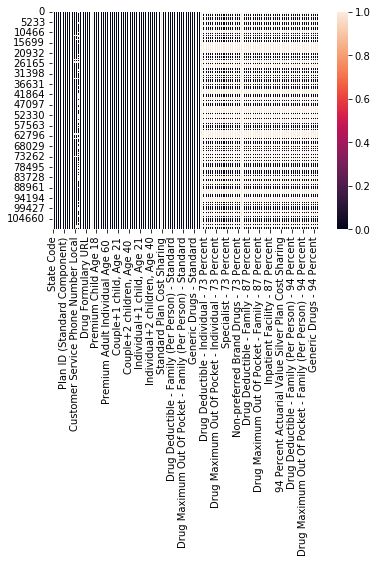

In [10]:
sns.heatmap(qhp_data.isnull())

In [11]:
qhp_data['73 Percent Actuarial Value Silver Plan Cost Sharing'].value_counts()

Series([], Name: 73 Percent Actuarial Value Silver Plan Cost Sharing, dtype: int64)

In [12]:
qhp_data.loc[:, qhp_data.isna().all()].columns

Index(['Premium Scenarios', 'Standard Plan Cost Sharing',
       '73 Percent Actuarial Value Silver Plan Cost Sharing',
       '87 Percent Actuarial Value Silver Plan Cost Sharing',
       '94 Percent Actuarial Value Silver Plan Cost Sharing'],
      dtype='object')

In [13]:
#drop null columns
qhp = qhp_data.drop(['Premium Scenarios', 'Standard Plan Cost Sharing', '73 Percent Actuarial Value Silver Plan Cost Sharing', '87 Percent Actuarial Value Silver Plan Cost Sharing', '94 Percent Actuarial Value Silver Plan Cost Sharing'], axis = 1)

#observe reduction if we just dropped all rows with NaNs
print(qhp.shape)
print(qhp.dropna().shape)

(109880, 143)
(25498, 143)


In [14]:
plan_ids = set(qhp['Plan ID (Standard Component)'])
for plan in plan_ids:
    ehbs = qhp[qhp['Plan ID (Standard Component)'] == plan]['EHB Percent of Total Premium']
    
    if len(set(ehbs)) > 1:
        print('EHBs vary within plan id')
        break

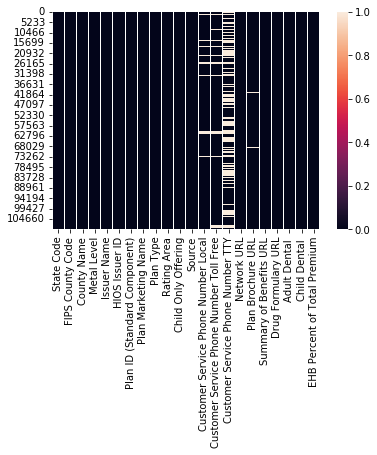

In [15]:
cols = []
for col in qhp.columns:
    if col == 'EHB Percent of Total Premium':
        cols.append(col)
        break
    cols.append(col)

qhp = qhp[cols]
sns.heatmap(qhp.isnull())

In [16]:
qhp.columns

Index(['State Code', 'FIPS County Code', 'County Name', 'Metal Level',
       'Issuer Name', 'HIOS Issuer ID', 'Plan ID (Standard Component)',
       'Plan Marketing Name', 'Plan Type', 'Rating Area',
       'Child Only Offering', 'Source', 'Customer Service Phone Number Local',
       'Customer Service Phone Number Toll Free',
       'Customer Service Phone Number TTY', 'Network URL', 'Plan Brochure URL',
       'Summary of Benefits URL', 'Drug Formulary URL', 'Adult Dental ',
       'Child Dental ', 'EHB Percent of Total Premium'],
      dtype='object')

In [17]:
qhp_columns = ['State Code', 'Metal Level', 'Issuer Name', 'Plan ID (Standard Component)', 'Plan Type', 'Child Only Offering', 'Adult Dental ', 'Child Dental ', 'EHB Percent of Total Premium']
qhp = qhp[qhp_columns]

In [18]:
#all nans left are in the EHB column
qhp[qhp.isna().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 66249 to 66634
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   State Code                    9 non-null      object
 1   Metal Level                   9 non-null      object
 2   Issuer Name                   9 non-null      object
 3   Plan ID (Standard Component)  9 non-null      object
 4   Plan Type                     9 non-null      object
 5   Child Only Offering           9 non-null      object
 6   Adult Dental                  9 non-null      int64 
 7   Child Dental                  9 non-null      int64 
 8   EHB Percent of Total Premium  0 non-null      object
dtypes: int64(2), object(7)
memory usage: 720.0+ bytes


In [19]:
#they are all catastrophic metal level
qhp[qhp.isna().any(axis=1)]['Metal Level'].value_counts()

Catastrophic    9
Name: Metal Level, dtype: int64

In [20]:
#They are from MI, OR, WI
qhp[qhp.isna().any(axis=1)]['State Code'].value_counts()

NH    9
Name: State Code, dtype: int64

In [21]:
qhp = qhp.dropna()

In [22]:
qhp.columns = ['state', 'metal', 'issuer', 'plan_id', 'plan_type', 'child_only_offering', 'adult_dental', 'child_dental', 'EHB_over_premium']
#since they don't differ by county, can drop duplicates
print('length of qhp before dropping duplicates: ', len(qhp))
qhp = qhp.drop_duplicates()
print('length of qhp after dropping duplicates: ', len(qhp))
qhp

length of qhp before dropping duplicates:  109871
length of qhp after dropping duplicates:  5151


,state,metal,issuer,plan_id,plan_type,child_only_offering,adult_dental,child_dental,EHB_over_premium
0,AK,Gold,Premera Blue Cross Blue Shield of Alaska,38344AK1060001,PPO,Allows Adult and Child-Only,0,0,99.30%
1,AK,Silver,Premera Blue Cross Blue Shield of Alaska,38344AK1060002,PPO,Allows Adult and Child-Only,0,0,99.40%
2,AK,Expanded Bronze,Premera Blue Cross Blue Shield of Alaska,38344AK1060004,PPO,Allows Adult and Child-Only,0,0,99.06%
3,AK,Silver,Premera Blue Cross Blue Shield of Alaska,38344AK1070001,PPO,Allows Adult and Child-Only,0,0,99.88%
4,AK,Expanded Bronze,Premera Blue Cross Blue Shield of Alaska,38344AK1070002,PPO,Allows Adult and Child-Only,0,0,99.80%
...,...,...,...,...,...,...,...,...,...
109413,WY,Expanded Bronze,Mountain Health CO-OP,38576WY0020003,PPO,Allows Adult and Child-Only,0,0,100.00%
109414,WY,Expanded Bronze,Mountain Health CO-OP,38576WY0020004,PPO,Allows Adult and Child-Only,0,0,100.00%
109415,WY,Gold,Mountain Health CO-OP,38576WY0020005,PPO,Allows Adult and Child-Only,0,0,100.00%
109416,WY,Silver,Mountain Health CO-OP,38576WY0020006,PPO,Allows Adult and Child-Only,0,0,100.00%


In [23]:
qhp['plan_id'].value_counts().max()

1

## Quality Data ##

In [24]:
#
quality_data = pd.read_csv('data\quality23.csv')
quality_data    

,IssuerID,State,Plan Type,ReportingUnitID,PlanID,OverallRatingValue,MedicalCareRatingValue,MemberExperienceRatingValue,PlanAdministrationRatingValue,NotRatedReason_OverallRatingDesc,NotRatedReason_MedicalCareRatingDesc,NotRatedReason_MemberExperienceRatingDesc,NotRatedReason_PlanAdministrationRatingDesc
0,10091,OR,PPO,10091-OR-PPO,10091OR0750002,4,4,3,5,NaN,NaN,NaN,NaN
1,10091,OR,PPO,10091-OR-PPO,10091OR0750003,4,4,3,5,NaN,NaN,NaN,NaN
2,10091,OR,PPO,10091-OR-PPO,10091OR0750004,4,4,3,5,NaN,NaN,NaN,NaN
3,10091,OR,PPO,10091-OR-PPO,10091OR0750005,4,4,3,5,NaN,NaN,NaN,NaN
4,10091,OR,PPO,10091-OR-PPO,10091OR0750011,4,4,3,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,99969,OH,HMO,99969-OH-HMO,99969OH0080434,4,4,3,3,NaN,NaN,NaN,NaN
6374,99969,OH,HMO,99969-OH-HMO,99969OH0080435,4,4,3,3,NaN,NaN,NaN,NaN
6375,99969,OH,HMO,99969-OH-HMO,99969OH0080436,4,4,3,3,NaN,NaN,NaN,NaN
6376,99969,OH,HMO,99969-OH-HMO,99969OH0080438,4,4,3,3,NaN,NaN,NaN,NaN


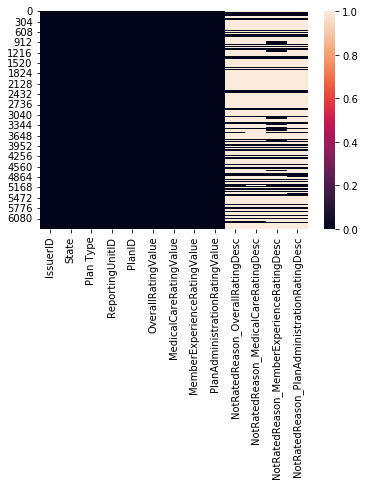

In [25]:
sns.heatmap(quality_data.isnull())

In [26]:
qual_data = quality_data[['PlanID', 'OverallRatingValue', 'MedicalCareRatingValue', 'MemberExperienceRatingValue', 'PlanAdministrationRatingValue']]
qual_data = qual_data.replace('NR', np.nan)
qual_data = qual_data.dropna()
qual_data.columns = ['PlanID', 'overall_rating', 'medcare_rating', 'member_exp_rating', 'plan_admin_rating']
qual_data

,PlanID,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating
0,10091OR0750002,4,4,3,5
1,10091OR0750003,4,4,3,5
2,10091OR0750004,4,4,3,5
3,10091OR0750005,4,4,3,5
4,10091OR0750011,4,4,3,5
...,...,...,...,...,...
6373,99969OH0080434,4,4,3,3
6374,99969OH0080435,4,4,3,3
6375,99969OH0080436,4,4,3,3
6376,99969OH0080438,4,4,3,3


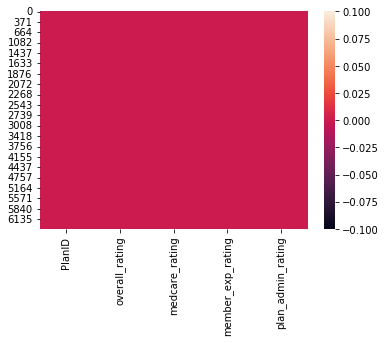

In [27]:
sns.heatmap(qual_data.isnull())

In [28]:
qual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4103 entries, 0 to 6377
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PlanID             4103 non-null   object
 1   overall_rating     4103 non-null   object
 2   medcare_rating     4103 non-null   object
 3   member_exp_rating  4103 non-null   object
 4   plan_admin_rating  4103 non-null   object
dtypes: object(5)
memory usage: 192.3+ KB


In [29]:
merged = qhp.merge(qual_data, how = 'left', left_on='plan_id', right_on='PlanID')
merged

,state,metal,issuer,plan_id,plan_type,child_only_offering,adult_dental,child_dental,EHB_over_premium,PlanID,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating
0,AK,Gold,Premera Blue Cross Blue Shield of Alaska,38344AK1060001,PPO,Allows Adult and Child-Only,0,0,99.30%,38344AK1060001,3,3,3,4
1,AK,Silver,Premera Blue Cross Blue Shield of Alaska,38344AK1060002,PPO,Allows Adult and Child-Only,0,0,99.40%,38344AK1060002,3,3,3,4
2,AK,Expanded Bronze,Premera Blue Cross Blue Shield of Alaska,38344AK1060004,PPO,Allows Adult and Child-Only,0,0,99.06%,38344AK1060004,3,3,3,4
3,AK,Silver,Premera Blue Cross Blue Shield of Alaska,38344AK1070001,PPO,Allows Adult and Child-Only,0,0,99.88%,NaN,NaN,NaN,NaN,NaN
4,AK,Expanded Bronze,Premera Blue Cross Blue Shield of Alaska,38344AK1070002,PPO,Allows Adult and Child-Only,0,0,99.80%,38344AK1070002,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,WY,Expanded Bronze,Mountain Health CO-OP,38576WY0020003,PPO,Allows Adult and Child-Only,0,0,100.00%,NaN,NaN,NaN,NaN,NaN
5147,WY,Expanded Bronze,Mountain Health CO-OP,38576WY0020004,PPO,Allows Adult and Child-Only,0,0,100.00%,NaN,NaN,NaN,NaN,NaN
5148,WY,Gold,Mountain Health CO-OP,38576WY0020005,PPO,Allows Adult and Child-Only,0,0,100.00%,NaN,NaN,NaN,NaN,NaN
5149,WY,Silver,Mountain Health CO-OP,38576WY0020006,PPO,Allows Adult and Child-Only,0,0,100.00%,NaN,NaN,NaN,NaN,NaN


In [30]:
#38576WY0020003 has nans for quality scores. Lets just make sure thats right
qual_data[qual_data['PlanID'] == '38576WY0020003']

,PlanID,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating


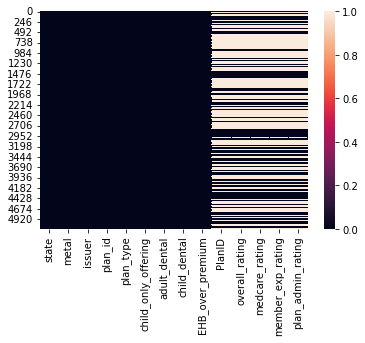

In [31]:
sns.heatmap(merged.isnull())

### Looking at plans with no quality scores ###

In [32]:
#plans with no quality scores
merged[merged.isna().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 3 to 5150
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   state                2942 non-null   object
 1   metal                2942 non-null   object
 2   issuer               2942 non-null   object
 3   plan_id              2942 non-null   object
 4   plan_type            2942 non-null   object
 5   child_only_offering  2942 non-null   object
 6   adult_dental         2942 non-null   int64 
 7   child_dental         2942 non-null   int64 
 8   EHB_over_premium     2942 non-null   object
 9   PlanID               0 non-null      object
 10  overall_rating       0 non-null      object
 11  medcare_rating       0 non-null      object
 12  member_exp_rating    0 non-null      object
 13  plan_admin_rating    0 non-null      object
dtypes: int64(2), object(12)
memory usage: 344.8+ KB


In [33]:
merged[merged.isna().any(axis=1)]['state'].value_counts()

FL    412
TX    345
NC    274
GA    192
WI    175
IL    134
MO    123
TN    121
OK    116
KS    111
VA    108
MI    101
OH     97
NE     88
AZ     83
UT     66
SC     62
LA     58
IA     47
AR     39
OR     30
IN     29
MS     27
AL     23
NH     17
ND     16
DE     13
WV     11
SD     10
WY      7
AK      5
MT      2
Name: state, dtype: int64

In [34]:
merged[merged.isna().any(axis=1)]['issuer'].value_counts()

Bright HealthCare                           624
Oscar Insurance Company                     272
UnitedHealthcare                            146
Medica                                      115
Ambetter from Superior HealthPlan           109
                                           ... 
HealthKeepers, Inc.                           1
Florida Health Care Plans                     1
Blue Cross and Blue Shield of Alabama         1
FirstCare Health Plans                        1
Premera Blue Cross Blue Shield of Alaska      1
Name: issuer, Length: 104, dtype: int64

In [35]:
merged[merged.isna().any(axis=1)]['metal'].value_counts()

Silver             1185
Expanded Bronze     972
Gold                529
Bronze              146
Catastrophic        105
Platinum              5
Name: metal, dtype: int64

In [36]:
data = merged.dropna()

## Feature Engineering ##

In [37]:
#fixing quality metrics and ehb
data['EHB_over_premium'] = percent2float(data['EHB_over_premium'])
quality_metrics = ['overall_rating', 'medcare_rating', 'member_exp_rating', 'plan_admin_rating']
for qual in quality_metrics:
    data[qual] = str2int(data[qual])

C:\Users\brend\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\brend\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 5143
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                2209 non-null   object 
 1   metal                2209 non-null   object 
 2   issuer               2209 non-null   object 
 3   plan_id              2209 non-null   object 
 4   plan_type            2209 non-null   object 
 5   child_only_offering  2209 non-null   object 
 6   adult_dental         2209 non-null   int64  
 7   child_dental         2209 non-null   int64  
 8   EHB_over_premium     2209 non-null   float64
 9   PlanID               2209 non-null   object 
 10  overall_rating       2209 non-null   int64  
 11  medcare_rating       2209 non-null   int64  
 12  member_exp_rating    2209 non-null   int64  
 13  plan_admin_rating    2209 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 258.9+ KB


In [39]:
data = data.drop('PlanID', axis = 1)

In [40]:
len(set(data['state']))

32

In [41]:
len(set(qhp_data['State Code']))

33

In [42]:
data['metal'].value_counts()

Silver             753
Expanded Bronze    679
Gold               450
Bronze             167
Catastrophic       131
Platinum            29
Name: metal, dtype: int64

In [43]:
data['issuer'].value_counts()

Blue Cross and Blue Shield of Texas       276
Blue Cross and Blue Shield of Illinois    108
Blue Cross Blue Shield of Arizona          96
Medica                                     75
BlueCross BlueShield of Tennessee          73
                                         ... 
Priority Health                             5
University of Utah Health Plans             5
Wellmark Health Plan of Iowa, Inc.          4
MercyCare Health Plans                      4
CareFirst BlueChoice                        3
Name: issuer, Length: 83, dtype: int64

## Modeling ##

In [44]:
mdl_data = data[['state', 'metal', 'plan_type', 'child_only_offering', 'adult_dental', 'child_dental', 'EHB_over_premium', 'overall_rating', 'medcare_rating', 'member_exp_rating', 'plan_admin_rating']]
mdl_data

,state,metal,plan_type,child_only_offering,adult_dental,child_dental,EHB_over_premium,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating
0,AK,Gold,PPO,Allows Adult and Child-Only,0,0,0.9930,3,3,3,4
1,AK,Silver,PPO,Allows Adult and Child-Only,0,0,0.9940,3,3,3,4
2,AK,Expanded Bronze,PPO,Allows Adult and Child-Only,0,0,0.9906,3,3,3,4
4,AK,Expanded Bronze,PPO,Allows Adult and Child-Only,0,0,0.9980,3,3,3,4
5,AK,Gold,PPO,Allows Adult and Child-Only,0,0,0.9945,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...
5139,WY,Gold,PPO,Allows Adult and Child-Only,0,0,1.0000,2,2,2,4
5140,WY,Gold,PPO,Allows Adult and Child-Only,0,0,1.0000,2,2,2,4
5141,WY,Bronze,PPO,Allows Adult and Child-Only,0,0,1.0000,2,2,2,4
5142,WY,Silver,PPO,Allows Adult and Child-Only,0,0,1.0000,2,2,2,4


In [88]:
X_pre = mdl_data[['state', 'metal', 'plan_type', 'child_only_offering', 'adult_dental', 'child_dental', 'EHB_over_premium']]
Y = mdl_data[['overall_rating', 'medcare_rating', 'member_exp_rating', 'plan_admin_rating']]
X = pd.get_dummies(X_pre, drop_first = True)


for resp in Y.columns:
    y = Y[resp]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=91)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_rounded = list(map(round, y_pred))
    print(round(model.score(X, y), 3), ' R^2 score for ', resp)
    print(round(r2_score(y_test, y_pred_rounded), 3), ' Rounded R^2 score for ', resp)
    print('\n')

0.611  R^2 score for  overall_rating
0.467  Rounded R^2 score for  overall_rating


0.681  R^2 score for  medcare_rating
0.581  Rounded R^2 score for  medcare_rating


0.67  R^2 score for  member_exp_rating
0.577  Rounded R^2 score for  member_exp_rating


0.556  R^2 score for  plan_admin_rating
0.364  Rounded R^2 score for  plan_admin_rating




In [46]:
for resp in Y.columns:
    y = Y[resp]
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 3, random_state = 700)
    param_grid = dict(alpha=list(np.arange(0.05, 1, .05)))

    model = Lasso()
    search = GridSearchCV(model, param_grid, scoring = 'r2', cv = cv)
    result = search.fit(X, y)
    print(round(result.best_score_, 3), ' LASSO R^2 score for ', resp)

0.194  LASSO R^2 score for  overall_rating
0.311  LASSO R^2 score for  medcare_rating
0.278  LASSO R^2 score for  member_exp_rating
0.042  LASSO R^2 score for  plan_admin_rating


In [47]:
#logistic
for resp in Y.columns:
    y = Y[resp]
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 3, random_state = 700)
    param_grid = dict(multi_class=['ovr', 'multinomial'])

    model = LogisticRegression(max_iter = 1000)
    search = GridSearchCV(model, param_grid, scoring = 'accuracy', cv = cv)
    result = search.fit(X, y)
    print(round(result.best_score_, 3), ' accuracy score for ', resp)
    print('Best Hyperparameters: %s' % result.best_params_)

0.779  accuracy score for  overall_rating
Best Hyperparameters: {'multi_class': 'multinomial'}
0.815  accuracy score for  medcare_rating
Best Hyperparameters: {'multi_class': 'multinomial'}
0.838  accuracy score for  member_exp_rating
Best Hyperparameters: {'multi_class': 'multinomial'}
0.806  accuracy score for  plan_admin_rating
Best Hyperparameters: {'multi_class': 'multinomial'}


In [48]:
#Classification Random Forest
for resp in Y.columns:
    y = Y[resp]

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 3, random_state = 6)
    distributions = dict(max_depth=list(range(1,25)), n_estimators= list(range(1,100)))

    rfc = RandomForestClassifier(random_state=7)

    search = RandomizedSearchCV(rfc, distributions, n_iter = 250, scoring = 'accuracy', n_jobs = -1,  cv = cv, random_state = 12)
    result = search.fit(X, y)

    print('for response variable: ', resp)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

for response variable:  overall_rating
Best Score: 0.8688682310531051
Best Hyperparameters: {'n_estimators': 35, 'max_depth': 22}
for response variable:  medcare_rating
Best Score: 0.882603639746497
Best Hyperparameters: {'n_estimators': 37, 'max_depth': 20}
for response variable:  member_exp_rating
Best Score: 0.916857683244238
Best Hyperparameters: {'n_estimators': 45, 'max_depth': 21}
for response variable:  plan_admin_rating
Best Score: 0.8749079118827019
Best Hyperparameters: {'n_estimators': 54, 'max_depth': 20}


for response variable:  overall_rating
Best Score: 0.8641925146126828
Best Hyperparameters: {'max_depth': 24}




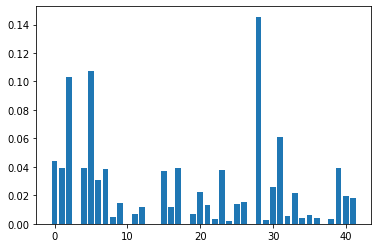

top three features:  ['EHB_over_premium', 'state_AZ', 'state_TX']
for response variable:  medcare_rating
Best Score: 0.8780708864742479
Best Hyperparameters: {'max_depth': 24}




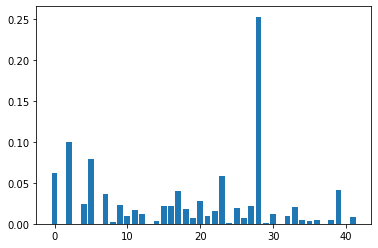

top three features:  ['state_AZ', 'EHB_over_premium', 'state_TX']
for response variable:  member_exp_rating
Best Score: 0.9168566571927919
Best Hyperparameters: {'max_depth': 24}




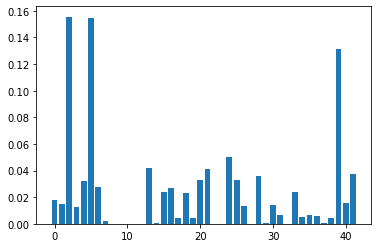

top three features:  ['plan_type_HMO', 'state_AZ', 'EHB_over_premium']
for response variable:  plan_admin_rating
Best Score: 0.8732392102140002
Best Hyperparameters: {'max_depth': 18}




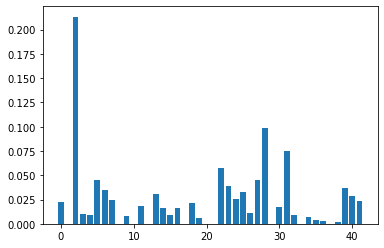

top three features:  ['state_WI', 'state_TX', 'EHB_over_premium']


In [49]:
#decision tree
for resp in Y.columns:
    y = Y[resp]
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 3, random_state = 4)
    param_grid = dict(max_depth=list(range(1,25)))

    clf = DecisionTreeClassifier(random_state = 20)
    search = GridSearchCV(clf, param_grid, scoring = 'accuracy', cv = cv)
    result = search.fit(X, y)
    print('for response variable: ', resp)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    print('\n')
    
    md = result.best_params_['max_depth']
    clf = DecisionTreeClassifier(random_state = 20, max_depth = md).fit(X, y)
    importance = clf.feature_importances_
    
    plt.figure()
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    top_3_idx = np.argsort(importance)[-3:]
    top_3_feats = [X.columns[i] for i in top_3_idx]
    print('top three features: ', top_3_feats)
    

In [50]:
X.columns[28]

'state_TX'

### PCA ###

In [51]:
#qhp data
std_X = scale(X)

pca = PCA()
pca_X = pca.fit_transform(std_X)
print(pca.explained_variance_ratio_[:5])

[0.07345132 0.05375181 0.04220115 0.0371885  0.03405972]


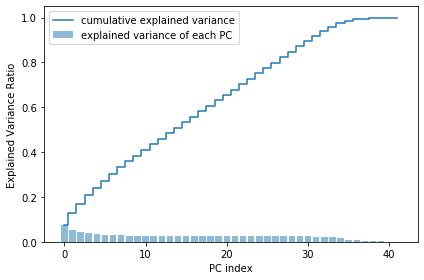

In [52]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='explained variance of each PC')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PC index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [53]:
#quality data
std_y = scale(Y)

pca = PCA()
pca_y = pca.fit_transform(std_y)
print(pca.explained_variance_ratio_[:5])

[0.52126784 0.25847885 0.19213375 0.02811956]


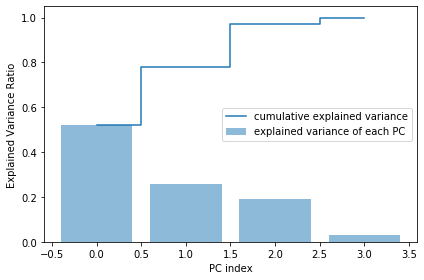

In [54]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='explained variance of each PC')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PC index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [55]:
Y.corr()

,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating
overall_rating,1.000000,0.870514,0.223804,0.250568
medcare_rating,0.870514,1.000000,0.070576,0.291489
member_exp_rating,0.223804,0.070576,1.000000,0.222006
plan_admin_rating,0.250568,0.291489,0.222006,1.000000


In [56]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns = ['PC1', 'PC2', 'PC3', 'PC4'], index = Y.columns)
loading_matrix

,PC1,PC2,PC3,PC4
overall_rating,0.924018,-0.235805,-0.189385,-0.234888
medcare_rating,0.907058,-0.349535,-0.028007,0.233966
member_exp_rating,0.358085,0.796966,-0.484711,0.046147
plan_admin_rating,0.530309,0.470585,0.705186,-0.022070


In [57]:
#quality data for quality metrics without overall
Y_sub = Y[Y.columns[1:]]

std_y = scale(Y_sub)

pca = PCA()
pca_y = pca.fit_transform(std_y)
print(pca.explained_variance_ratio_[:5])

[0.4674693  0.31071756 0.22181314]


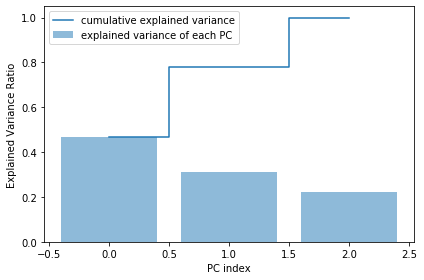

In [58]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='explained variance of each PC')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PC index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [59]:
Y_sub.corr()

,medcare_rating,member_exp_rating,plan_admin_rating
medcare_rating,1.000000,0.070576,0.291489
member_exp_rating,0.070576,1.000000,0.222006
plan_admin_rating,0.291489,0.222006,1.000000


In [60]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns = ['PC1', 'PC2', 'PC3'], index = Y_sub.columns)
loading_matrix

,PC1,PC2,PC3
medcare_rating,0.675307,-0.576401,-0.460624
member_exp_rating,0.558207,0.772999,-0.302209
plan_admin_rating,0.797125,-0.052997,0.601860


### Quality Metrics ###

In [61]:
for qual in quality_metrics:
    qual_data[qual] = str2int(qual_data[qual])
ratings = qual_data[['overall_rating', 'medcare_rating', 'member_exp_rating', 'plan_admin_rating']]
ratings.corr()

,overall_rating,medcare_rating,member_exp_rating,plan_admin_rating
overall_rating,1.000000,0.879154,0.128936,0.265582
medcare_rating,0.879154,1.000000,0.000712,0.318390
member_exp_rating,0.128936,0.000712,1.000000,0.196289
plan_admin_rating,0.265582,0.318390,0.196289,1.000000


In [81]:
X = sm.add_constant(ratings[['medcare_rating', 'member_exp_rating', 'plan_admin_rating']])
y = ratings['overall_rating']
#X['med_sq'] = X['medcare_rating'] * X['medcare_rating']
#X['memb_sq'] = X['member_exp_rating'] * X['member_exp_rating']
#X['plan_sq'] = X['plan_admin_rating'] * X['plan_admin_rating']

#X['med_cub'] = X['med_sq'] * X['medcare_rating']
#X['memb_cub'] = X['memb_sq'] * X['member_exp_rating']
#X['plan_cub'] = X['plan_sq'] * X['plan_admin_rating']

model = sm.OLS(y, X)

res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     5177.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:31:13   Log-Likelihood:                -1243.5
No. Observations:                4103   AIC:                             2495.
Df Residuals:                    4099   BIC:                             2520.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0356      0.037     28.131      0.000       0.963       1.108
medcare_rating        0.6734      0.006    118.432      0.000       0.662       0.685
member_exp_rating     0.1443      0.008     18.822      0.000       0.129       0.159
plan_admin_rating    -0.0557      0.009     -5.965      0.000      -0.074      -0.037
==============================================================================
Omnibus:                      446.352   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.245
Skew:                          -0.905   Prob(JB):                    2.76e-131
Kurtosis:                       3.494   Cond. No.                         42.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
y_pred_rounded = list(map(round, res.predict()))
r2_score(y, y_pred_rounded)

0.8259996232960212

In [83]:
r2_score(y, res.predict())

0.7911875823427034